In [1]:
import pandas as pd
import duckdb as duck
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data/marketing_AB.csv')

In [3]:
data=duck.read_csv('Data/marketing_AB.csv')
data

┌─────────┬─────────┬────────────┬───────────┬───────────┬──────────────┬───────────────┐
│ column0 │ user id │ test group │ converted │ total ads │ most ads day │ most ads hour │
│  int64  │  int64  │  varchar   │  boolean  │   int64   │   varchar    │     int64     │
├─────────┼─────────┼────────────┼───────────┼───────────┼──────────────┼───────────────┤
│       0 │ 1069124 │ ad         │ false     │       130 │ Monday       │            20 │
│       1 │ 1119715 │ ad         │ false     │        93 │ Tuesday      │            22 │
│       2 │ 1144181 │ ad         │ false     │        21 │ Tuesday      │            18 │
│       3 │ 1435133 │ ad         │ false     │       355 │ Tuesday      │            10 │
│       4 │ 1015700 │ ad         │ false     │       276 │ Friday       │            14 │
│       5 │ 1137664 │ ad         │ false     │       734 │ Saturday     │            10 │
│       6 │ 1116205 │ ad         │ false     │       264 │ Wednesday    │            13 │
│       7 

In [4]:
duck.query('select COUNT(DISTINCT "user id")/COUNT(*) from data')

┌────────────────────────────────────────────┐
│ (count(DISTINCT "user id") / count_star()) │
│                   double                   │
├────────────────────────────────────────────┤
│                                        1.0 │
└────────────────────────────────────────────┘

#### Findings:

All the user are distict

## Question:

Would the campaign be successful?
    

Theory

Seen ads leads to conversion True

Seen PSA lead to conversion True

In [5]:
duck.query('select DISTINCT "test group" from data')

┌────────────┐
│ test group │
│  varchar   │
├────────────┤
│ ad         │
│ psa        │
└────────────┘

In [6]:
duck.sql('from data').to_df().isnull().sum()

column0          0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [7]:
def sql(query):
    return duck.sql(query)

In [8]:
sql('select "test group",converted from data').to_df()['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

<Axes: xlabel='converted', ylabel='count'>

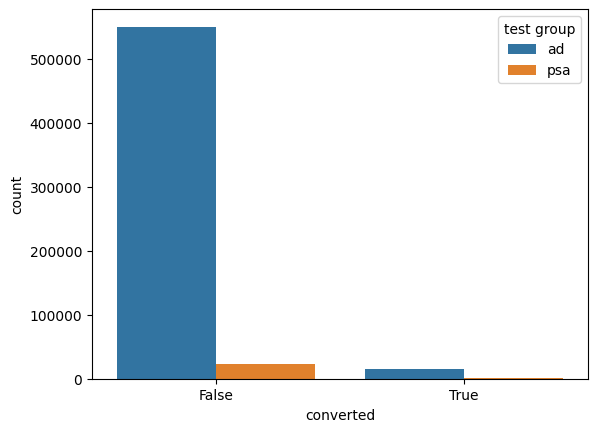

In [9]:
sns.countplot(data=df,hue='test group',x='converted')

## Z-test

Group 1: People who seen ads

Group 2: People who did not seen ads (seen PSA)

Null hypothesis: There is no difference b/w both the group

Alternative hypothesis: There is significant difference b/w groups

In [10]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

In [11]:
# z-test
ztest(df.loc[df['test group']=='ad','converted'],df.loc[df['test group']=='psa','converted'])

(7.37040597428566, 1.7010920800498703e-13)

In [12]:
# t-test
ttest_ind(df.loc[df['test group']=='ad','converted'],df.loc[df['test group']=='psa','converted'])

TtestResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13, df=588099.0)

#### Interesting

Something that i learnt, when number of observation above 30, t-distribution start folloing normal distribution, thus you can see the same stats and p value using ztest and ttest.

## Conversion Rate

In [13]:
# Seen ads and bought product out of total people seen ads
len(df.loc[((df['test group']=='ad') & (df['converted']==1))])/len(df.loc[df['test group']=='ad','converted'])

0.025546559636683747

In [14]:
# Seen psa and bought product out of total people seen psa
len(df.loc[((df['test group']=='psa') & (df['converted']==1))])/len(df.loc[df['test group']=='psa','converted'])

0.01785410644448223

## Conclusion

Z-test: There is significant difference between groups

Conversion rate: People who seen ads and bought product have higher rate as compare to people who seen 'PSA' and bought product